# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Import Required Packages.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_path = '/content/drive/MyDrive/NYC_TAXI_TRIP_TIME_PRED/NYC_Taxi_Data.csv'
nyc_df = pd.read_csv(data_path)

In [ ]:
nyc_df.shape

(1458644, 11)

In [ ]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In this NYC dataset, There are 1458644 entries and 11 columns. 
Out of total 11 columns- 'id', 'pickup datetime', 'drop off datetime' and 'store and fwd flag' are non numerical columns.

In [ ]:
print(list(nyc_df.columns))

['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration']


In [ ]:
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
nyc_df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [ ]:
# Checking null values in nyc_df
nyc_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
# Checking duplicated ids in id column
nyc_df.duplicated(subset = 'id').sum()

0

In [ ]:
nyc_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
# Changing datetime data type 
nyc_df['pickup_datetime']=pd.to_datetime(nyc_df['pickup_datetime'])
nyc_df['dropoff_datetime']=pd.to_datetime(nyc_df['dropoff_datetime'])

In [ ]:
nyc_df['pickup_day']=nyc_df['pickup_datetime'].dt.day_name()
nyc_df['dropoff_day']=nyc_df['dropoff_datetime'].dt.day_name()
nyc_df['pickup_month']=nyc_df['pickup_datetime'].dt.month
nyc_df['dropoff_month']=nyc_df['dropoff_datetime'].dt.month
nyc_df['pickup_hr']=nyc_df['pickup_datetime'].dt.hour

In [ ]:
!pip install haversine
from haversine import haversine

In [ ]:
def calculate_distance(pickup_lat, pickup_long, droppff_lat, dropoff_long):
  start_coordinates=(pickup_lat, pickup_long)
  stop_coordinates=(droppff_lat, dropoff_long)
  return haversine(start_coordinates, stop_coordinates)

In [ ]:
nyc_df['distance'] =nyc_df.apply(lambda x: calculate_distance(x['pickup_latitude'], x['pickup_longitude'], x['dropoff_latitude'], x['dropoff_longitude']), axis = 1)

In [ ]:
nyc_df['speed'] = (nyc_df['distance']/(nyc_df['trip_duration']/3600))

In [ ]:
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hr,distance,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,17,1.498523,11.856445
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,0,1.805510,9.803672
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,11,6.385107,10.822216
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,4,4,19,1.485500,12.465738
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,3,3,13,1.188590,9.836608


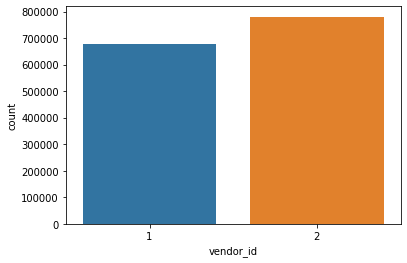

In [ ]:
sns.countplot(x = nyc_df['vendor_id'])
plt.show()

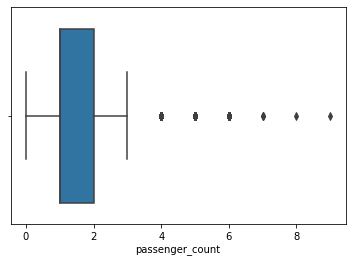

In [ ]:
sns.boxplot(x = nyc_df['passenger_count'])
plt.show()

In [ ]:
nyc_df['passenger_count'].value_counts().to_frame()

,passenger_count
1,1033540
2,210318
5,78088
3,59896
6,48333
4,28404
0,60
7,3
9,1
8,1


In [ ]:
outlier_passenger_df = nyc_df[nyc_df['passenger_count']>6]
nyc_df = nyc_df.drop(outlier_passenger_df.index, axis=0)

In [ ]:
nyc_df['passenger_count'] = nyc_df['passenger_count'].map(lambda x:1 if x == 0 else x)

In [ ]:
nyc_df['passenger_count'].value_counts().to_frame()

,passenger_count
1,1033600
2,210318
5,78088
3,59896
6,48333
4,28404


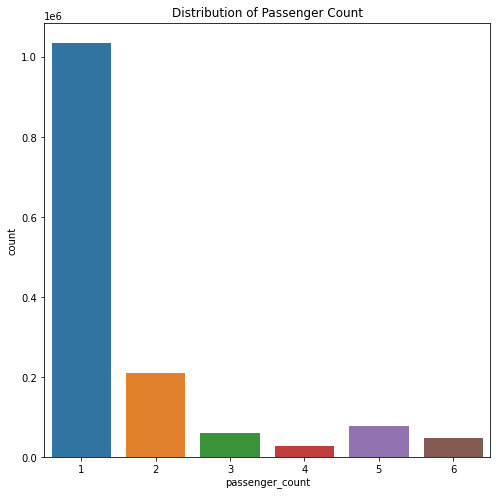

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x=nyc_df['passenger_count'])
plt.title('Distribution of Passenger Count')
plt.show()

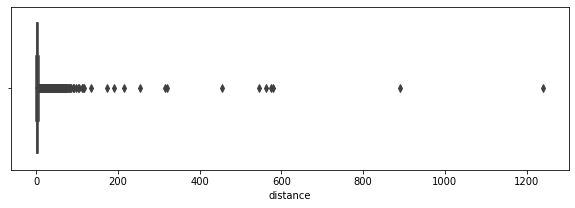

In [ ]:
plt.figure(figsize= (10,3))
sns.boxplot(x = nyc_df['distance'])
plt.show()

There some trips whose distance is above 100 km and some of trips are having 0 Km distance.

In [ ]:
distance_zero = len(nyc_df[nyc_df['distance']== 0])
print(f'The ntotal number of trips with 0 Km distance are \n {distance_zero}')

The ntotal number of trips with 0 Km distance are 
 5895


In [ ]:
# Dropped distance rows having 0 entry
distance_zero = nyc_df[nyc_df['distance'] == 0]
nyc_df = nyc_df.drop(distance_zero.index, axis=0)

In [ ]:
distance_abv_100 = len(nyc_df[nyc_df['distance'] >= 100])
print(f'The total number of trips with mmore than 100 Km distance are \n {distance_abv_100}')

The total number of trips with mmore than 100 Km distance are 
 19


In [ ]:
# Dropped rows with distance above 100km as it is very few entries
distance_above_100 = nyc_df[nyc_df['distance'] >=101]
nyc_df = nyc_df.drop(distance_above_100.index, axis=0)

In [ ]:
distance_less_than_21 = len(nyc_df[nyc_df['distance'] < 21])
print(f'The total number of trips with less than 21 Km distance are \n {distance_less_than_21 }.')

The total number of trips with less than 21 Km distance are 
 1440501.


In [ ]:
nyc_df.distance.describe()

count    1.452725e+06
mean     3.450063e+00
std      3.946481e+00
min      4.241756e-04
25%      1.240534e+00
50%      2.102742e+00
75%      3.887982e+00
max      9.758635e+01
Name: distance, dtype: float64

The descriptive summary of a distance column tell us that avg trip distance is 3.45 Km.

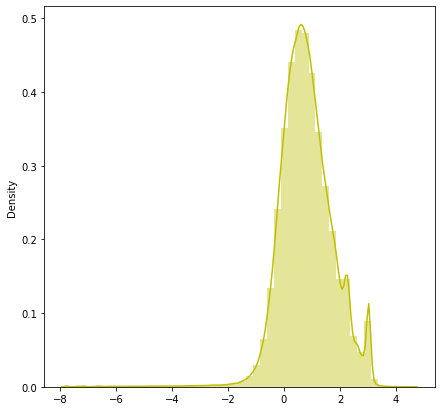

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(x=np.log(nyc_df['distance']), color="y")
plt.show()

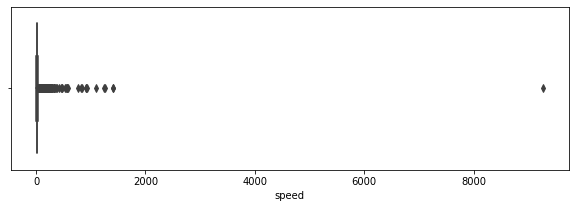

In [ ]:
# Checking speed of trips
plt.figure(figsize= (10,3))
sns.boxplot(x = nyc_df['speed'])
plt.show()

In [ ]:
# Lets see the average speed of a trip
nyc_df['speed'].mean()

14.459683418386259

In [ ]:
number_trips_above_avg_speed = len(nyc_df[nyc_df['speed'] > nyc_df['speed'].mean()])
print(f'The total number of trips with more than avg speed are \n {number_trips_above_avg_speed }.')

The total number of trips with more than avg speed are 
 585214.


In [ ]:
temp_df = nyc_df[nyc_df['speed'] <=100]
number_trips_lessthan_100 = len(temp_df[temp_df['speed'] <= 100 ])
print(f'The total number of trips with less than or eqaul to 100km/hr speed are {number_trips_lessthan_100}.')

The total number of trips with less than or eqaul to 100km/hr speed are 1452564.


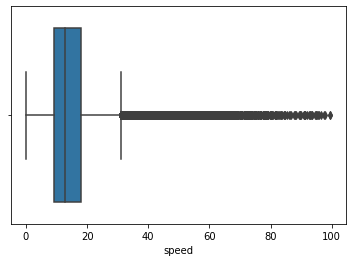

In [ ]:
sns.boxplot(x = temp_df['speed'])
plt.show()

In [ ]:
outlier_speed_df = nyc_df[nyc_df['speed'] > 100]
nyc_df = nyc_df.drop(outlier_speed_df.index, axis=0)

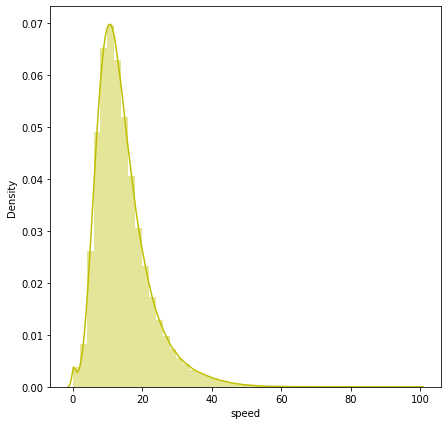

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(nyc_df['speed'],color="y")
plt.show()

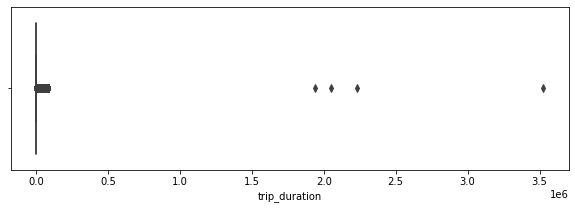

In [ ]:
# Boxplot for a trip duration
plt.figure(figsize= (10,3))
sns.boxplot(x = nyc_df['trip_duration'])
plt.show()

In [ ]:
outlier_trip_pred = nyc_df.nlargest(4, 'trip_duration')
nyc_df = nyc_df.drop(outlier_trip_pred.index, axis=0)

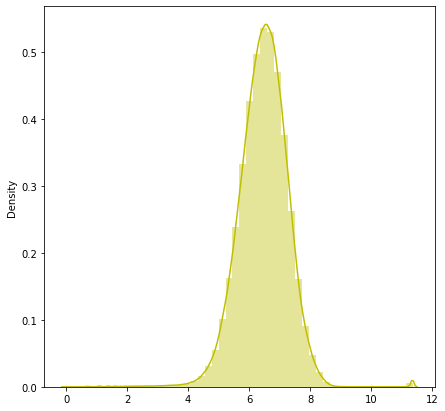

In [ ]:
# Log transformed plot of a trip duration
plt.figure(figsize=(7,7))
sns.distplot(x=np.log(nyc_df['trip_duration']), color="y")
plt.show()

In [ ]:
nyc_df['pickup_day'].value_counts()

Friday       222591
Saturday     219979
Thursday     217629
Wednesday    209273
Tuesday      201914
Sunday       194526
Monday       186648
Name: pickup_day, dtype: int64

Pickup day data tell us about the **most of trips taken** on **Friday** and **Monday** is a day where **least trips taken.**

In [ ]:
nyc_df['dropoff_day'].value_counts()

Friday       222096
Saturday     220007
Thursday     216804
Wednesday    208928
Tuesday      201683
Sunday       196383
Monday       186659
Name: dropoff_day, dtype: int64

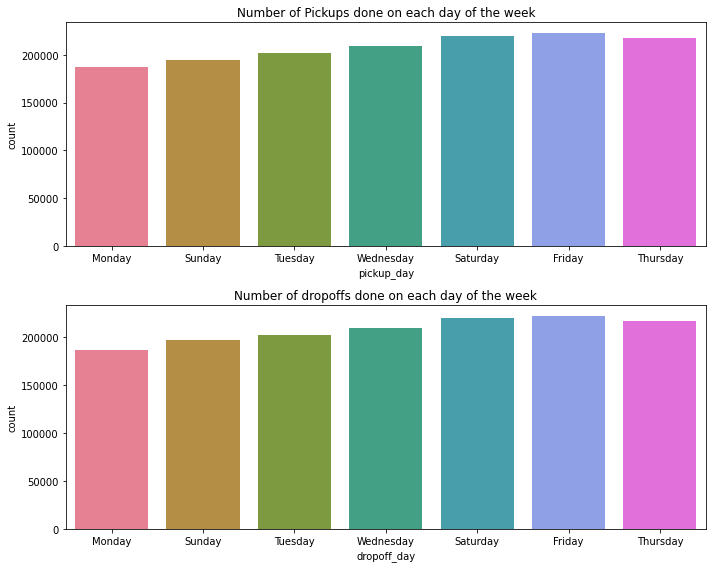

In [ ]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,8))
sns.countplot(x='pickup_day',data=nyc_df, palette = 'husl', ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=nyc_df, palette = 'husl', ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

In [ ]:
nyc_df['pickup_month'].value_counts()

3    255188
4    250615
5    247480
2    237321
6    233264
1    228692
Name: pickup_month, dtype: int64

In [ ]:
nyc_df['dropoff_month'].value_counts()

3    255132
4    250606
5    247548
2    237315
6    233192
1    228641
7       126
Name: dropoff_month, dtype: int64

In [ ]:
nyc_df[nyc_df['dropoff_month']== 7].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hr,distance,speed
46600,id1230274,2,2016-06-30 08:00:53,2016-07-01 07:46:38,4,-73.922516,40.771847,-73.776398,40.645748,N,85545,Thursday,Friday,6,7,8,18.662627,0.785381
54314,id0462006,1,2016-06-30 23:42:19,2016-07-01 00:01:12,1,-73.994049,40.756538,-74.007645,40.708820,N,1133,Thursday,Friday,6,7,23,5.428265,17.247798
59891,id2837671,2,2016-06-30 16:37:52,2016-07-01 16:37:39,1,-73.992279,40.749729,-73.962524,40.800770,N,86387,Thursday,Friday,6,7,16,6.203910,0.258535
77419,id2787535,2,2016-06-30 23:51:36,2016-07-01 00:01:20,1,-73.971390,40.787788,-73.995918,40.762280,N,584,Thursday,Friday,6,7,23,3.508784,21.629491
115092,id2785585,2,2016-06-30 23:47:29,2016-07-01 00:08:00,1,-74.005623,40.750610,-73.962303,40.763119,N,1231,Thursday,Friday,6,7,23,3.904872,11.419608


Drop off month 7 tell us that **127 trips** started in 6th month and ended in 7th month.

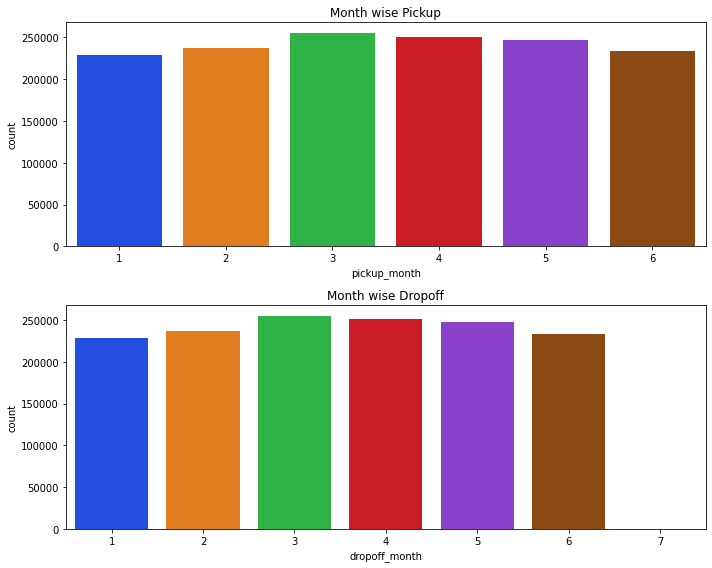

In [ ]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,8))
sns.countplot(x='pickup_month',data=nyc_df, palette = 'bright', ax=ax[0])
ax[0].set_title('Month wise Pickup')
sns.countplot(x='dropoff_month',data=nyc_df, palette = 'bright', ax=ax[1])
ax[1].set_title('Month wise Dropoff')
plt.tight_layout()

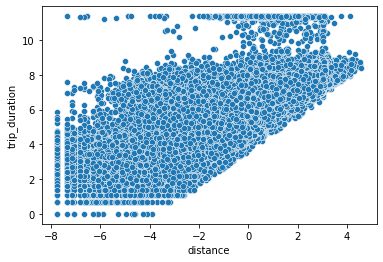

In [ ]:
sns.scatterplot(x = np.log(nyc_df['distance']), y = np.log(nyc_df['trip_duration']))
plt.show()

In [ ]:
nycdf = nyc_df.copy()

In [ ]:
nyc_x = nycdf.drop(['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'dropoff_day', 'dropoff_month', 'speed'], axis = 1)

In [ ]:
nyc_x

,vendor_id,passenger_count,store_and_fwd_flag,pickup_day,pickup_month,pickup_hr,distance
0,2,1,N,Monday,3,17,1.498523
1,1,1,N,Sunday,6,0,1.805510
2,2,1,N,Tuesday,1,11,6.385107
3,2,1,N,Wednesday,4,19,1.485500
4,2,1,N,Saturday,3,13,1.188590
...,...,...,...,...,...,...,...
1458639,2,4,N,Friday,4,13,1.225082
1458640,1,1,N,Sunday,1,7,6.049844
1458641,2,1,N,Friday,4,6,7.824617
1458642,1,1,N,Tuesday,1,15,1.092565


In [ ]:
nyc_X= pd.get_dummies(nyc_x, columns=["store_and_fwd_flag", "pickup_day"], prefix=["flag", "day"], drop_first=True)

In [ ]:
nyc_X.head()

,vendor_id,passenger_count,pickup_month,pickup_hr,distance,flag_Y,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,2,1,3,17,1.498523,0,1,0,0,0,0,0
1,1,1,6,0,1.805510,0,0,0,1,0,0,0
2,2,1,1,11,6.385107,0,0,0,0,0,1,0
3,2,1,4,19,1.485500,0,0,0,0,0,0,1
4,2,1,3,13,1.188590,0,0,1,0,0,0,0


In [ ]:
from scipy.stats import zscore
X = nyc_X.apply(zscore)

In [114]:
y = np.log10(nycdf['trip_duration'])

In [115]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [116]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [117]:
LR.score(x_train, y_train)

0.4060040925189523

In [118]:
LR.score(x_test, y_test)

0.40463735395812317

In [119]:
y_pred = LR.predict(x_test)

In [142]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0002 , max_iter= 3000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0002, max_iter=3000)

In [143]:
lasso.score(x_train, y_train)

0.40599940292883807